,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16056,07/23/2018 12:00:00 AM,Brooklyn Bridge,57,20,37,cloudy,75.0,0.0103,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


/var/folders/1h/2npktzns08x76y9n54xrj55h0000gn/T/ipykernel_3517/1513169147.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour_beginning"] = pd.to_datetime(df["hour_beginning"], errors="coerce")


<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Brooklyn Bridge Pedestrian Counts (Weekdays Only)')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Pedestrian Count (sum)')

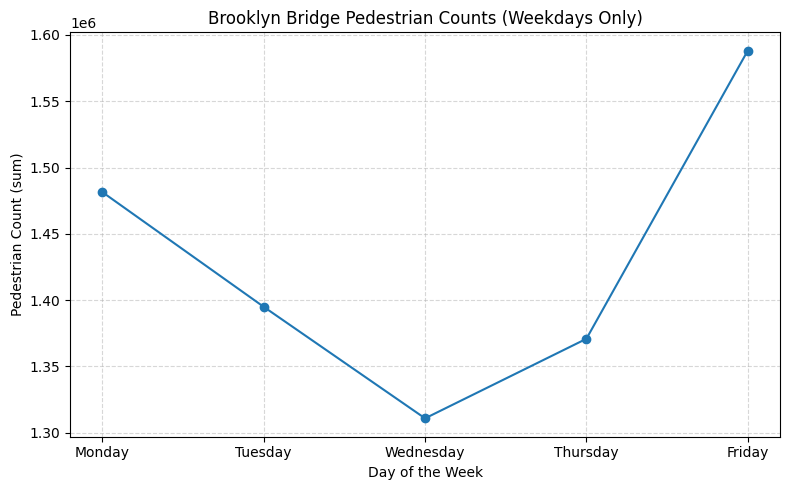

In [7]:
# Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

url = '/Users/sallyyang/Downloads/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv'
df = pd.read_csv(url,sep=',')
df.head()
df.tail()

df["hour_beginning"] = pd.to_datetime(df["hour_beginning"], errors="coerce")

df["WeekdayName"] = df["hour_beginning"].dt.day_name()   # Monday, Tuesday, ...
df["WeekdayNum"] = df["hour_beginning"].dt.weekday       # Monday=0, Sunday=6


df_weekdays = df[df["WeekdayNum"] < 5]

weekday_summary = (
    df_weekdays.groupby("WeekdayName")["Pedestrians"]
    .sum()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
)


plt.figure(figsize=(8, 5))
plt.plot(weekday_summary.index, weekday_summary.values, marker="o")
plt.title("Brooklyn Bridge Pedestrian Counts (Weekdays Only)")
plt.xlabel("Day of the Week")
plt.ylabel("Pedestrian Count (sum)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()




Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


(16057, 12)

/var/folders/1h/2npktzns08x76y9n54xrj55h0000gn/T/ipykernel_3517/3795508997.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour_beginning"] = pd.to_datetime(df["hour_beginning"], errors="coerce")


hour_beginning          0
location                0
Pedestrians             0
Towards Manhattan       0
Towards Brooklyn        0
weather_summary        14
temperature            14
precipitation          14
lat                     0
long                    0
events               8189
Location1               0
dtype: int64

weather_summary
partly-cloudy-day      1574.093627
clear-day              1382.183298
wind                    679.000000
cloudy                  543.225041
rain                    229.822076
snow                    222.631579
fog                     212.409091
sleet                   178.250000
partly-cloudy-night      52.765922
clear-night              33.233871
Name: Pedestrians, dtype: float64


<Figure size 1000x500 with 0 Axes>

/var/folders/1h/2npktzns08x76y9n54xrj55h0000gn/T/ipykernel_3517/3795508997.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_summary.index, y=weather_summary.values, palette="mako")


<Axes: xlabel='weather_summary'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'partly-cloudy-day'),
  Text(1, 0, 'clear-day'),
  Text(2, 0, 'wind'),
  Text(3, 0, 'cloudy'),
  Text(4, 0, 'rain'),
  Text(5, 0, 'snow'),
  Text(6, 0, 'fog'),
  Text(7, 0, 'sleet'),
  Text(8, 0, 'partly-cloudy-night'),
  Text(9, 0, 'clear-night')])

Text(0.5, 1.0, 'Average Pedestrian Count by Weather (2019, Brooklyn Bridge)')

Text(0, 0.5, 'Average Pedestrian Count')

Text(0.5, 0, 'Weather Summary')

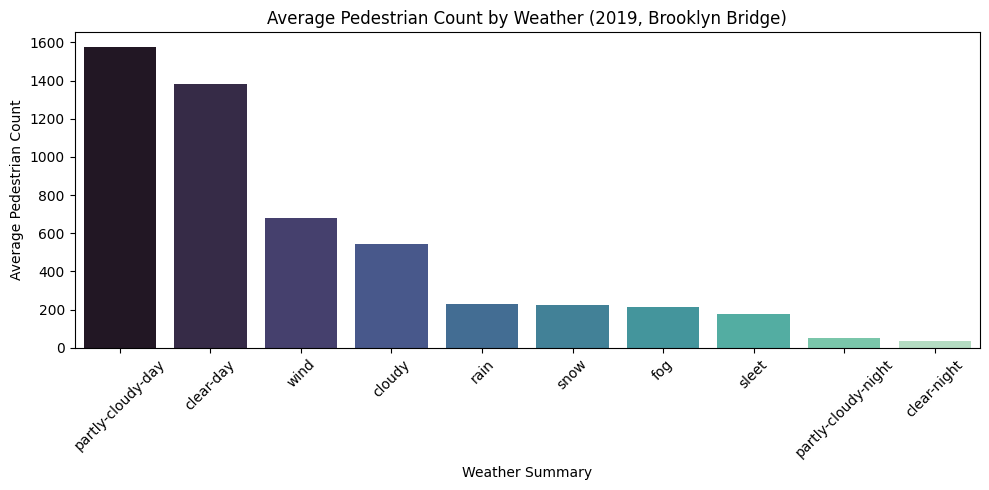

       Pedestrians  temperature  precipitation
count  8747.000000  8747.000000    8747.000000
mean    687.223734    55.008003       0.004423
std     898.733964    17.925231       0.023102
min       0.000000     2.000000       0.000000
25%       5.000000    40.000000       0.000000
50%     166.000000    56.000000       0.000000
75%    1303.000000    70.000000       0.000000
max    4286.000000    97.000000       0.680400

Correlation matrix:
                Pedestrians  temperature  precipitation
Pedestrians       1.000000     0.358757      -0.105432
temperature       0.358757     1.000000       0.001911
precipitation    -0.105432     0.001911       1.000000


<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix: Pedestrians vs Weather Variables (2019)')

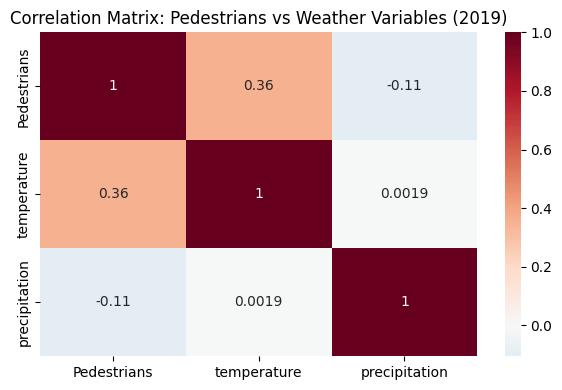

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

url = '/Users/sallyyang/Downloads/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv'
df = pd.read_csv(url,sep=',')
df.columns
df.info()
df.shape



df["hour_beginning"] = pd.to_datetime(df["hour_beginning"], errors="coerce")

df_2019 = df[df["hour_beginning"].dt.year == 2019]
df_2019.isna().sum()
df_2019 = df_2019.dropna(subset=["weather_summary", "Pedestrians","temperature","precipitation"])

weather_summary = (
    df_2019.groupby("weather_summary")["Pedestrians"]
    .mean()
    .sort_values(ascending=False)
)
print(weather_summary)


plt.figure(figsize=(10,5))
sns.barplot(x=weather_summary.index, y=weather_summary.values, palette="mako")
plt.xticks(rotation=45)
plt.title("Average Pedestrian Count by Weather (2019, Brooklyn Bridge)")
plt.ylabel("Average Pedestrian Count")
plt.xlabel("Weather Summary")
plt.tight_layout()
plt.show()

num_df = df_2019[["Pedestrians", "temperature", "precipitation"]].copy()


print(num_df.describe())


corr_matrix = num_df.corr()
print("\nCorrelation matrix:\n", corr_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="RdBu_r", center=0)
plt.title("Correlation Matrix: Pedestrians vs Weather Variables (2019)")
plt.tight_layout()
plt.show()



Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


(16057, 12)

/var/folders/1h/2npktzns08x76y9n54xrj55h0000gn/T/ipykernel_3517/1186073716.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour_beginning"] = pd.to_datetime(df["hour_beginning"], errors="coerce")


Total pedestrians by time of day:
 time_of_day
afternoon    5852025
evening      2661862
morning      2466776
night          52077
Name: Pedestrians, dtype: int64

Average pedestrians per hour by time of day:
 time_of_day
afternoon    1749.484305
evening       568.409567
morning       614.543099
night          13.022506
Name: Pedestrians, dtype: float64


<Figure size 700x400 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Activity by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Pedestrian Count')

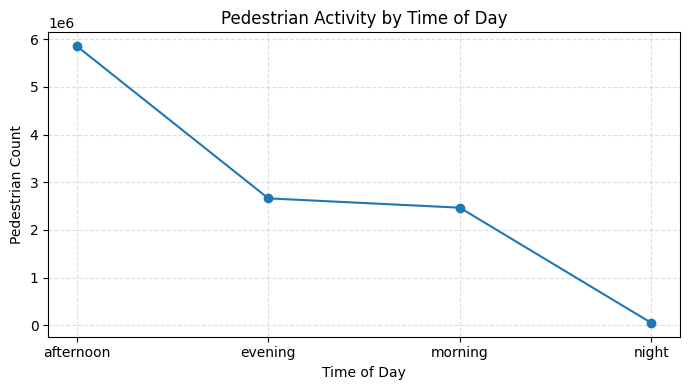

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

url = '/Users/sallyyang/Downloads/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv'
df = pd.read_csv(url,sep=',')
df.columns
df.info()
df.shape

df["hour_beginning"] = pd.to_datetime(df["hour_beginning"], errors="coerce")
df= df.dropna(subset=["weather_summary", "Pedestrians","temperature","precipitation"])


def categorize_time_of_day(ts):
    """
    Map a timestamp to a day-part label.
    Returns one of: 'night', 'morning', 'afternoon', 'evening'.
    If ts is NaT, returns NaN.
    """
    if pd.isna(ts):
        return np.nan
    h = ts.hour
    if 0 <= h < 6:
        return "night"
    elif 6 <= h < 12:
        return "morning"
    elif 12 <= h < 17:
        return "afternoon"
    else:
        return "evening"

# Create the new column
df["time_of_day"] = df["hour_beginning"].apply(categorize_time_of_day)



# Keep rows with valid numbers
df["Pedestrians"] = pd.to_numeric(df["Pedestrians"], errors="coerce")
tmp = df.dropna(subset=["time_of_day", "Pedestrians"])

# A) totals
by_part_sum = tmp.groupby("time_of_day")["Pedestrians"].sum()
print("Total pedestrians by time of day:\n", by_part_sum)

# B) averages
by_part_mean = tmp.groupby("time_of_day")["Pedestrians"].mean()
print("\nAverage pedestrians per hour by time of day:\n", by_part_mean)

series_to_plot = by_part_sum  # or by_part_mean, or by_part_2019

plt.figure(figsize=(7,4))
plt.plot(series_to_plot.index, series_to_plot.values, marker="o")
plt.title("Pedestrian Activity by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Pedestrian Count")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


